# Check what the signal looks like

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as ltb
from sklearn.neural_network import MLPClassifier

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# initial some global parameters
rep_inuse = 18
static_end = 6246044

### Import signals and labels

In [4]:
s011 = pd.read_csv('emg.csv', header = None)
label = pd.read_csv('grasp.csv', header = None)
grasprepetition = pd.read_csv('grasprepetition.csv', header = None)


s011_static = s011.iloc[0:static_end]
label_static = label.iloc[0:static_end]
grasprepetition_static = grasprepetition.iloc[0:static_end]

In [5]:
grasprepetition_static

,0
0,-5
1,-5
2,-5
3,-5
4,-5
...,...
6246039,24
6246040,24
6246041,24
6246042,24


In [6]:
s011_static.info()
label_static.info()
grasprepetition_static.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6246044 entries, 0 to 6246043
Data columns (total 12 columns):
 #   Column  Dtype  
---  ------  -----  
 0   0       float64
 1   1       float64
 2   2       float64
 3   3       float64
 4   4       float64
 5   5       float64
 6   6       float64
 7   7       float64
 8   8       float64
 9   9       float64
 10  10      float64
 11  11      float64
dtypes: float64(12)
memory usage: 571.8 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6246044 entries, 0 to 6246043
Data columns (total 1 columns):
 #   Column  Dtype
---  ------  -----
 0   0       int64
dtypes: int64(1)
memory usage: 47.7 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6246044 entries, 0 to 6246043
Data columns (total 1 columns):
 #   Column  Dtype
---  ------  -----
 0   0       int64
dtypes: int64(1)
memory usage: 47.7 MB


## Plot signals and labels

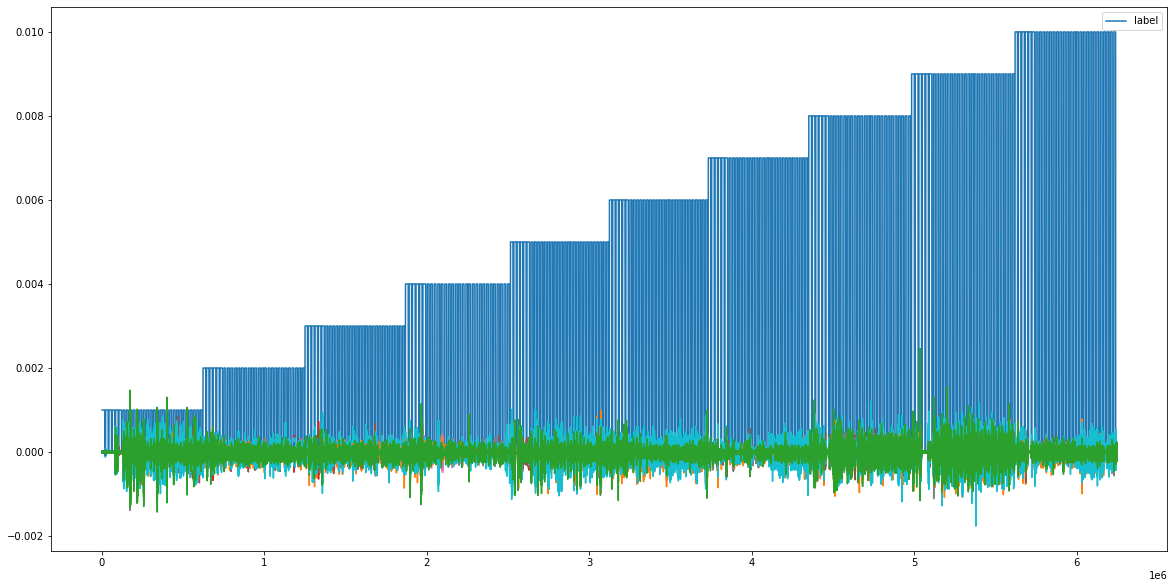

In [7]:
index = np.array(s011_static.index)
fig, ax = plt.subplots(1, figsize = (20,10))
line1, = ax.plot(label_static*0.001)
for i in tqdm(range(0,12)):
    ax.plot(index, s011_static[i])
    
line1.set_label('label')
ax.legend()
plt.show()

## Find training and testing data

In [8]:
grasprepetition_static

,0
0,-5
1,-5
2,-5
3,-5
4,-5
...,...
6246039,24
6246040,24
6246041,24
6246042,24


In [9]:
s011_static

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.000006,-3.504100e-07,2.376700e-06,1.450500e-06,0.000006,-7.564400e-07,3.159500e-06,-5.489800e-08,3.329300e-07,-2.781500e-06,-0.000002,-4.245700e-07
1,0.000004,1.798200e-06,-9.661500e-07,-6.018100e-08,0.000005,-3.274200e-06,1.878200e-08,-4.475800e-08,2.312300e-06,6.625000e-07,-0.000003,-6.416100e-07
2,0.000007,1.775700e-06,-4.412900e-06,1.282600e-06,0.000004,-3.945700e-06,-2.105300e-06,-5.330500e-08,5.365900e-06,4.109500e-06,-0.000003,3.385300e-06
3,0.000003,3.763500e-06,-6.942200e-06,-2.280100e-07,0.000002,-2.938600e-06,-4.208900e-06,-5.731100e-08,7.120800e-06,4.201600e-06,-0.000003,5.768000e-06
4,-0.000003,3.693800e-06,-7.695500e-06,-1.235100e-06,-0.000002,-1.595900e-06,-4.203500e-06,-4.585600e-08,7.788500e-06,6.378700e-07,-0.000003,3.209500e-06
...,...,...,...,...,...,...,...,...,...,...,...,...
6246039,-0.000014,-5.454400e-06,-6.487500e-06,-8.804500e-06,-0.000046,-1.174700e-05,-1.185900e-05,-1.214700e-07,-1.011500e-05,2.183300e-06,0.000028,1.010100e-04
6246040,-0.000019,-2.936700e-06,-5.816000e-06,-9.643900e-06,-0.000039,-3.491000e-05,-8.386600e-05,2.142100e-07,-1.011500e-05,5.876300e-06,0.000031,7.751600e-05
6246041,-0.000020,-4.189100e-07,-3.801800e-06,-8.301300e-06,-0.000027,-2.131400e-05,-9.091600e-05,4.632900e-08,-9.275600e-06,8.058700e-06,0.000028,2.800000e-05
6246042,-0.000014,8.475300e-08,-1.787600e-06,-5.783800e-06,-0.000004,3.575500e-05,-3.821200e-05,-1.215500e-07,-8.436100e-06,7.891300e-06,0.000005,4.668700e-06


In [10]:
# get the grasprepetition [1,9] as training data, [10,12] as testing data
train_index = []
test_index = []
for i in tqdm(range(len(grasprepetition_static))):
    if grasprepetition_static.iloc[i,0] in [1,2,3,4,5,6,7,8,9]:
        train_index.append(i)
    if grasprepetition_static.iloc[i,0] in [10,11,12]:
        test_index.append(i)

In [11]:
trainx = s011_static.iloc[train_index].reset_index(drop=True)
trainy = label_static.iloc[train_index].reset_index(drop=True)

testx1 = s011_static.iloc[test_index].reset_index(drop=True)
testy1 = label_static.iloc[test_index].reset_index(drop=True)


In [12]:
testx1
testy1

,0,1,2,3,4,5,6,7,8,9,10,11
0,4.422500e-07,0.000015,1.884500e-06,1.999600e-06,0.000006,-5.078200e-07,-0.000003,7.264000e-08,-2.682200e-05,-4.465100e-06,-6.578300e-06,-9.314100e-05
1,-2.584100e-06,0.000013,2.345400e-06,3.006800e-06,0.000005,1.506500e-06,-0.000003,7.264500e-08,-2.019800e-05,-2.749900e-06,-4.641000e-06,-3.398000e-05
2,-1.013900e-05,0.000008,1.567800e-06,2.671300e-06,0.000008,1.171000e-06,-0.000001,7.265000e-08,-1.347400e-05,2.817300e-06,-5.374500e-07,-1.316900e-05
3,-1.509200e-05,0.000002,1.564100e-06,6.364100e-06,0.000016,-1.716100e-07,-0.000003,7.265500e-08,-5.344300e-06,4.848200e-06,1.146100e-06,-1.145500e-05
4,-1.217700e-05,0.000002,1.837100e-06,8.546300e-06,0.000025,4.999700e-07,-0.000003,-9.519000e-08,9.258100e-07,4.019100e-06,3.735000e-07,-9.980300e-06
...,...,...,...,...,...,...,...,...,...,...,...,...
594924,-5.910000e-07,-0.000004,1.366500e-06,5.956100e-06,0.000003,-5.487900e-07,0.000001,2.770800e-07,-2.553800e-06,8.448800e-06,1.188900e-06,1.107600e-06
594925,-2.437500e-06,-0.000007,-4.798700e-07,5.452500e-06,0.000001,-5.485500e-07,-0.000001,1.092200e-07,-2.889600e-06,6.098800e-06,1.389200e-08,4.363600e-07
594926,-8.648100e-06,-0.000009,-8.156400e-07,5.284500e-06,0.000004,1.130200e-06,-0.000002,2.770700e-07,-2.889700e-06,4.252400e-06,1.021000e-06,-3.424000e-06
594927,-1.167000e-05,-0.000007,-6.478600e-07,3.438100e-06,0.000005,2.305300e-06,-0.000002,-5.864100e-08,-4.064700e-06,3.918300e-07,5.175600e-07,-3.423800e-06


,0
0,1
1,1
2,1
3,1
4,1
...,...
594924,0
594925,0
594926,0
594927,0


### plot training set

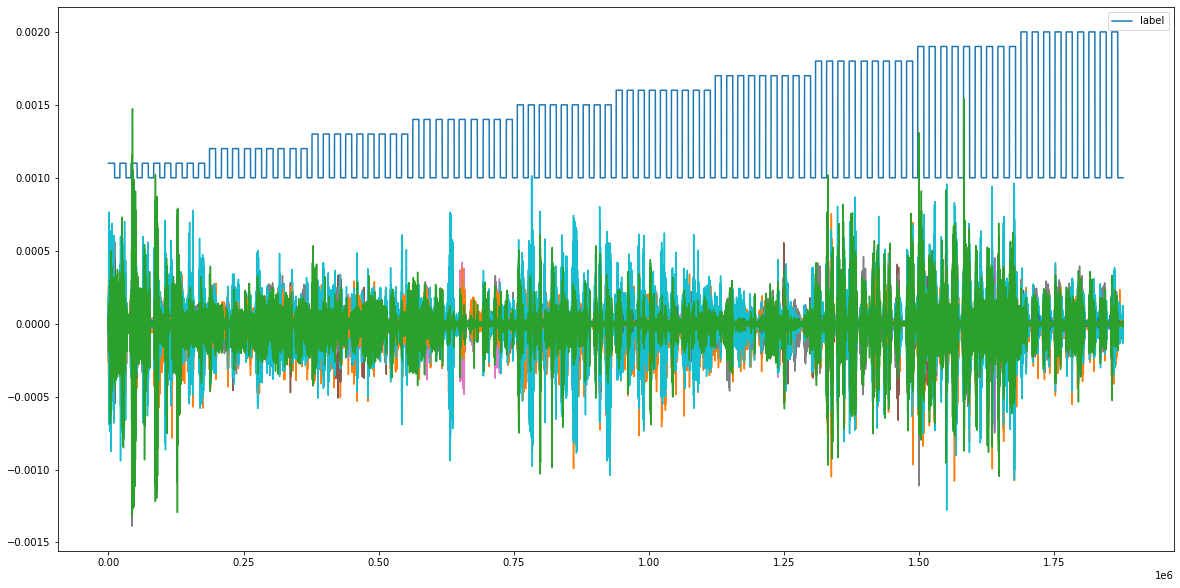

In [13]:
trainx = trainx.reset_index(drop = True)
trainy = trainy.reset_index(drop= True)

index = np.array(trainx.index)
fig, ax = plt.subplots(1, figsize = (20,10))
line1, = ax.plot(trainy*0.0001+0.001)
for i in tqdm(range(0,12)):
    ax.plot(index, trainx[i])
    
line1.set_label('label')
ax.legend()
plt.show()

In [14]:
# ten_start_point2
# ten_end_point2

### plot testing set #1

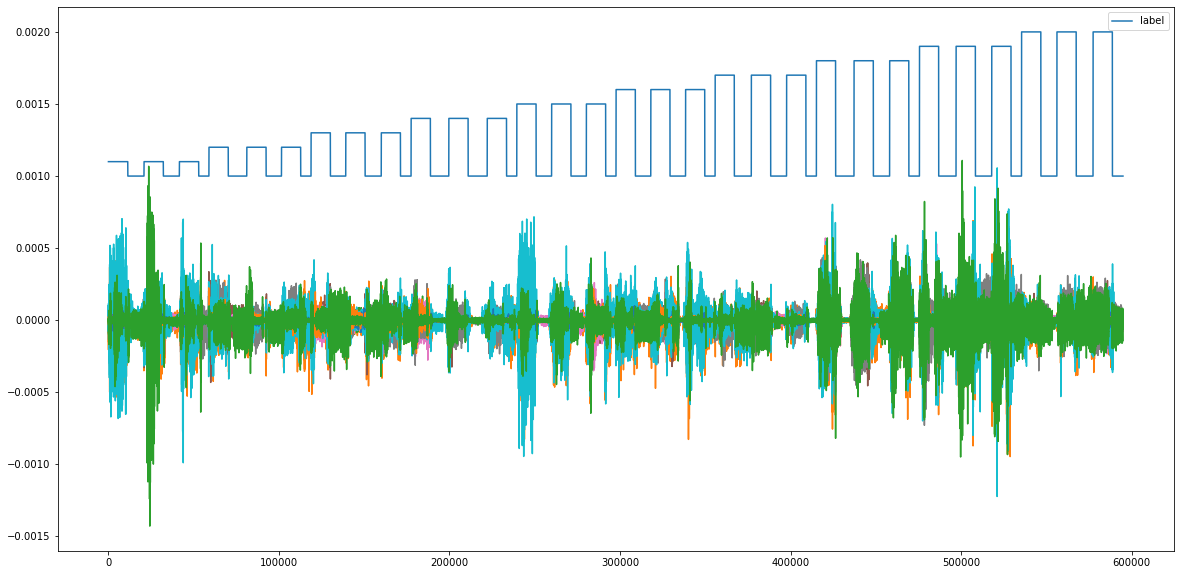

In [15]:
testx1 = testx1.reset_index(drop = True)
testy1 = testy1.reset_index(drop= True)

index = np.array(testx1.index)
fig, ax = plt.subplots(1, figsize = (20,10))
line1, = ax.plot(testy1*0.0001+0.001)
for i in tqdm(range(0,12)):
    ax.plot(index, testx1[i])
    
line1.set_label('label')
ax.legend()
plt.show()

In [16]:
testy1

,0
0,1
1,1
2,1
3,1
4,1
...,...
594924,0
594925,0
594926,0
594927,0


### find the testing set #2

## KNN model

In [49]:
knn_model = KNeighborsClassifier(n_neighbors = 5)

In [50]:
knn_model.fit(trainx,trainy)

<ipython-input-50-afb52ebdfb61>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn_model.fit(trainx,trainy)


KNeighborsClassifier()

In [53]:
expected1 = testy1.values.flatten()
predicted1 = knn_model.predict(testx1)

In [54]:
# expected2 = testy2.values.flatten()
# predicted2 = knn_model.predict(testx2)

In [55]:
expected1
predicted1

array([1, 1, 1, ..., 0, 0, 0])

array([0, 0, 0, ..., 0, 0, 0])

### calculate the accuracy

In [56]:
counter = 0
for i in range(0, len(expected1)):
    if expected1[i] == predicted1[i]:
        counter += 1

accuracy1 = counter/len(expected1)

In [57]:
# counter = 0
# for i in range(0, len(expected2)):
#     if expected2[i] == predicted2[i]:
#         counter += 1

# accuracy2 = counter/len(expected2)

In [58]:
accuracy1
# accuracy2

0.4258211015073602

### plot two testing results

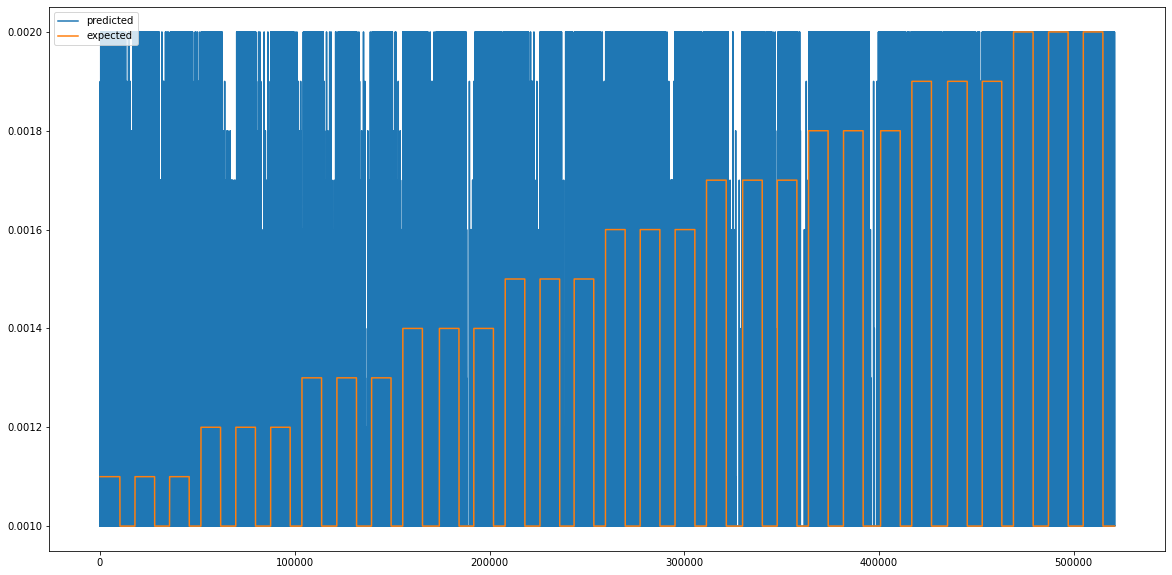

In [59]:
index = np.array(testy1.index)
fig, ax = plt.subplots(1, figsize = (20,10))
line1, = ax.plot(predicted1*0.0001+0.001)
line2, = ax.plot(expected1*0.0001+0.001)
    
line1.set_label('predicted')
line2.set_label('expected')
ax.legend()
plt.show()

In [60]:
# index = np.array(testy2.index)
# fig, ax = plt.subplots(1, figsize = (20,10))
# line1, = ax.plot(predicted2*0.0001+0.001)
# line2, = ax.plot(expected2*0.0001+0.001)
    
# line1.set_label('predicted')
# line2.set_label('expected')
# ax.legend()
# plt.show()

## lightGBM model

In [17]:
lightGBM_model = ltb.LGBMClassifier()

In [18]:
lightGBM_model.fit(trainx,trainy)

/Users/shuowang/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LGBMClassifier()

In [19]:
expected1 = testy1.values.flatten()
predicted1 = lightGBM_model.predict(testx1)

In [20]:
# expected2 = testy2.values.flatten()
# predicted2 = lightGBM_model.predict(testx2)

In [21]:
expected1
predicted1

array([1, 1, 1, ..., 0, 0, 0])

array([0, 0, 0, ..., 0, 0, 0])

### calculate the accuracy

In [22]:
counter = 0
for i in range(0, len(expected1)):
    if expected1[i] == predicted1[i]:
        counter += 1

accuracy1 = counter/len(expected1)

In [23]:
# counter = 0
# for i in range(0, len(expected2)):
#     if expected2[i] == predicted2[i]:
#         counter += 1

# accuracy2 = counter/len(expected2)

In [24]:
accuracy1
# accuracy2

0.5006883174294747

### plot two testing results

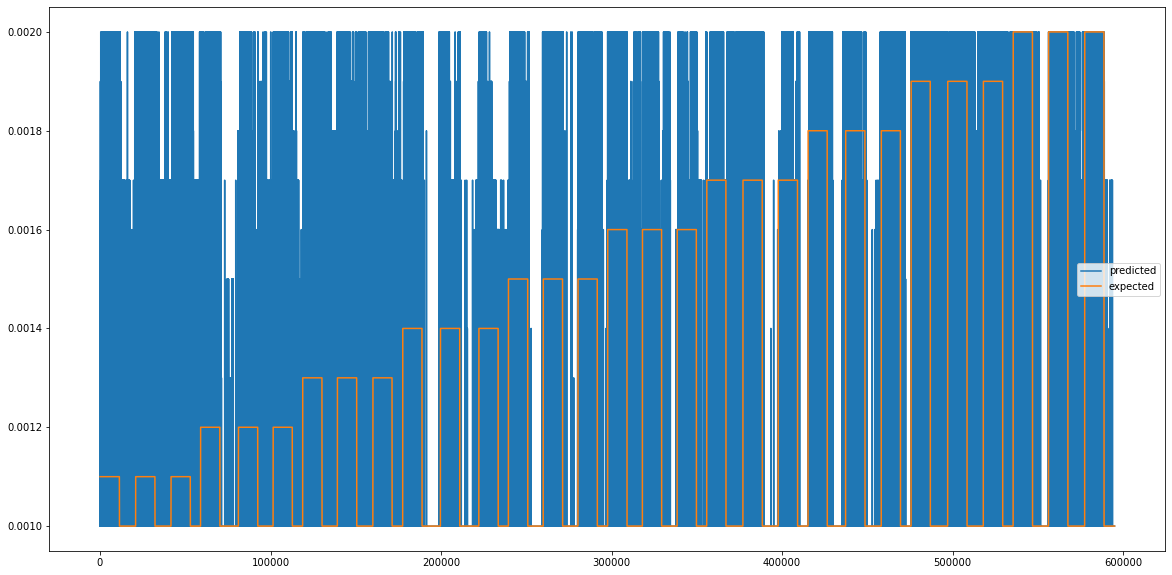

In [25]:
index = np.array(testy1.index)
fig, ax = plt.subplots(1, figsize = (20,10))
line1, = ax.plot(predicted1*0.0001+0.001)
line2, = ax.plot(expected1*0.0001+0.001)
    
line1.set_label('predicted')
line2.set_label('expected')
ax.legend()
plt.show()

In [26]:
# index = np.array(testy2.index)
# fig, ax = plt.subplots(1, figsize = (20,10))
# line1, = ax.plot(predicted2*0.0001+0.001)
# line2, = ax.plot(expected2*0.0001+0.001)
    
# line1.set_label('predicted')
# line2.set_label('expected')
# ax.legend()
# plt.show()

## MLP model

In [71]:
MLP_model = MLPClassifier(random_state=1, max_iter=300).fit(trainx,trainy)

/Users/shuowang/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [72]:
expected1 = testy1.values.flatten()
predicted1 = MLP_model.predict(testx1)

In [73]:
expected2 = testy2.values.flatten()
predicted2 = MLP_model.predict(testx2)

In [74]:
expected1
predicted1

array([ 1,  1,  1, ...,  0,  0, 10])

array([0, 0, 0, ..., 0, 0, 0])

### calculate the accuracy

In [75]:
counter = 0
for i in range(0, len(expected1)):
    if expected1[i] == predicted1[i]:
        counter += 1

accuracy1 = counter/len(expected1)

In [76]:
counter = 0
for i in range(0, len(expected2)):
    if expected2[i] == predicted2[i]:
        counter += 1

accuracy2 = counter/len(expected2)

In [77]:
accuracy1
accuracy2

0.3725006051803437

0.49985574148874784

### plot two testing results

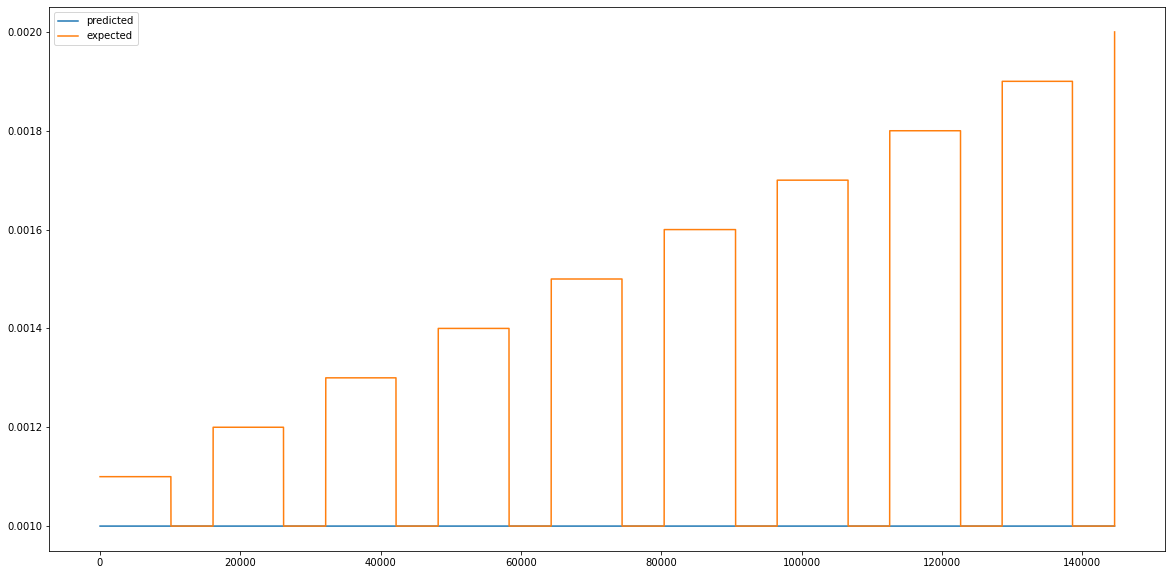

In [78]:
index = np.array(testy1.index)
fig, ax = plt.subplots(1, figsize = (20,10))
line1, = ax.plot(predicted1*0.0001+0.001)
line2, = ax.plot(expected1*0.0001+0.001)
    
line1.set_label('predicted')
line2.set_label('expected')
ax.legend()
plt.show()

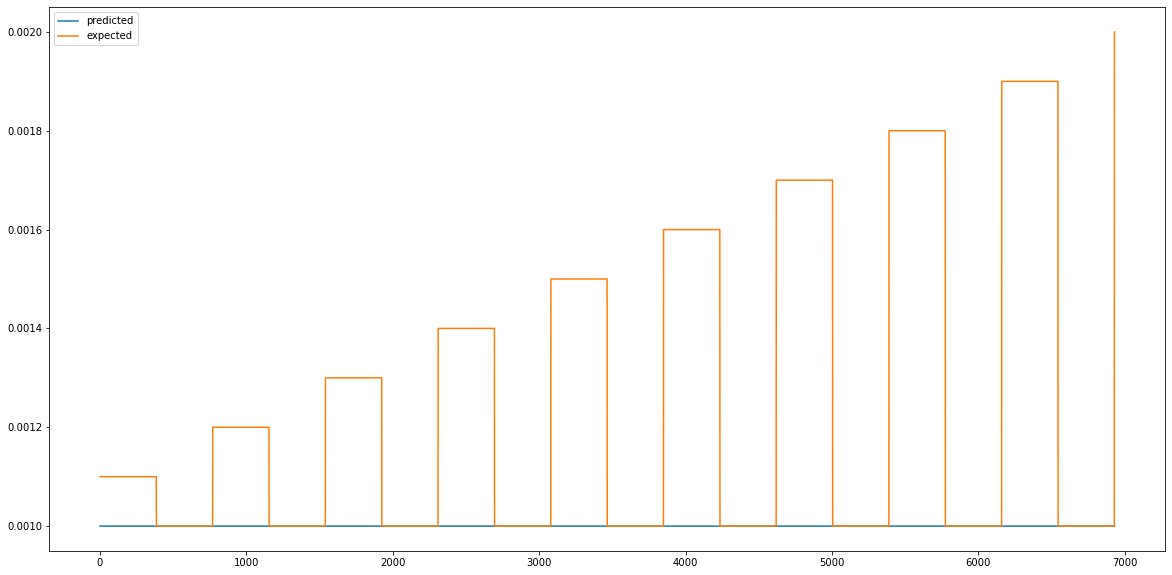

In [79]:
index = np.array(testy2.index)
fig, ax = plt.subplots(1, figsize = (20,10))
line1, = ax.plot(predicted2*0.0001+0.001)
line2, = ax.plot(expected2*0.0001+0.001)
    
line1.set_label('predicted')
line2.set_label('expected')
ax.legend()
plt.show()

## Linear model

In [93]:
from sklearn.linear_model import LinearRegression
reg_model = LinearRegression().fit(trainx, trainy)

expected1 = testy1.values.flatten()
predicted1 = reg_model.predict(testx1)

counter = 0
for i in range(0, len(expected1)):
    if expected1[i] == predicted1[i]:
        counter += 1

accuracy1 = counter/len(expected1)
accuracy1

0.0

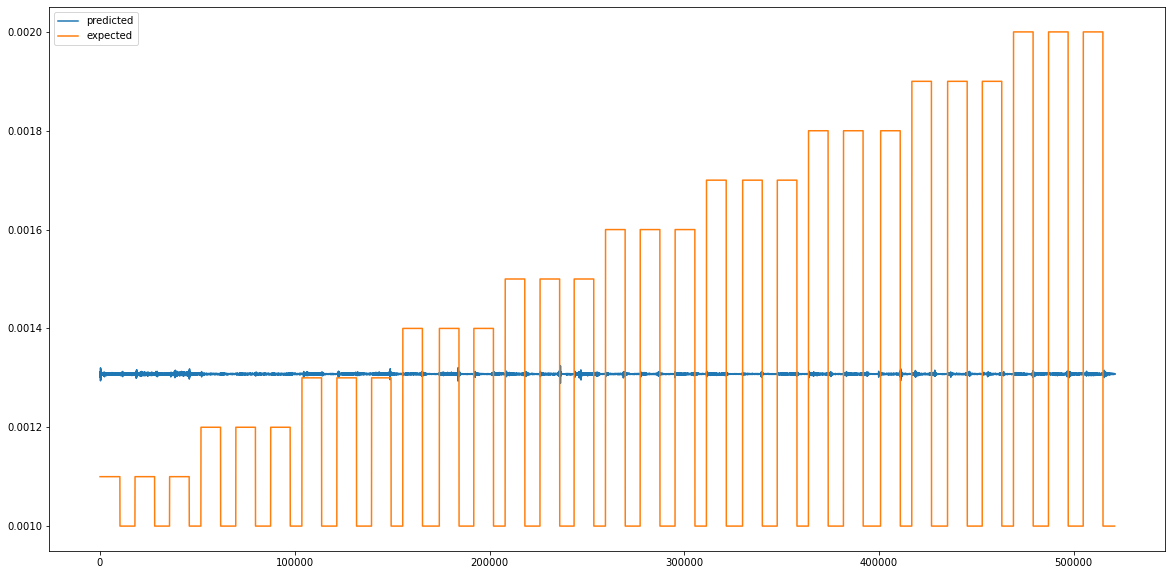

In [94]:
index = np.array(testy1.index)
fig, ax = plt.subplots(1, figsize = (20,10))
line1, = ax.plot(predicted1*0.0001+0.001)
line2, = ax.plot(expected1*0.0001+0.001)
    
line1.set_label('predicted')
line2.set_label('expected')
ax.legend()
plt.show()

In [80]:
trainx.to_csv('traintestdata/training_signals.csv')

In [81]:
trainy.to_csv('traintestdata/training_labels.csv')

In [82]:
testx1.to_csv('traintestdata/testing_signals.csv')

In [83]:
testy1.to_csv('traintestdata/testing_labels.csv')